## A K-Nearest Neighbor binary classifier using the 470-feature data set.

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, precision_score, recall_score, f1_score
from sklearn import preprocessing

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [120]:
len(df.index)

11598

In [121]:
features = df.iloc[0:11598,0:469].values
y = df['Class'].values

In [122]:
features_train, features_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [123]:
y_train_5 = (y_train!=5)
y_test_5 = (y_test!=5)

In [124]:
scaler = preprocessing.StandardScaler().fit(features_train)

In [125]:
features_scaled = scaler.transform(features_train)

In [126]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(features_scaled, y_train_5)

KNeighborsClassifier()

In [127]:
cross_val_score(clf, features_scaled, y_train_5, cv=5, scoring="accuracy", verbose=True)

array([0.9299569 , 0.94396552, 0.93911638, 0.94555256, 0.93153639])

In [128]:
y_train_pred = cross_val_predict(clf, features_scaled, y_train_5, cv=5)

In [129]:
confusion_matrix(y_train_5, y_train_pred)

array([[ 989,  458],
       [ 117, 7714]])

In [130]:
precision_score(y_train_5, y_train_pred)

0.9439549681840431

In [131]:
recall_score(y_train_5, y_train_pred)

0.9850593793896054

In [132]:
f1_score(y_train_5, y_train_pred)

0.9640692370180591

In [133]:
tn,fp,fn,tp = confusion_matrix(y_train_5,y_train_pred).ravel()

In [134]:
tn,fp,fn,tp

(989, 458, 117, 7714)

In [135]:
test_scaler = preprocessing.StandardScaler().fit(features_test)

In [136]:
features_scaled = scaler.transform(features_test)

In [137]:
y_test_pred = cross_val_predict(clf, features_scaled, y_test_5, cv=3)

In [138]:
confusion_matrix(y_test_5, y_test_pred)

array([[ 185,  163],
       [  16, 1956]])

In [139]:
precision_score(y_test_5, y_test_pred)

0.9230769230769231

In [140]:
recall_score(y_test_5, y_test_pred)

0.9918864097363083

In [141]:
f1_score(y_test_5, y_test_pred)

0.9562454167685163

In [142]:
tn,fp,fn,tp = confusion_matrix(y_test_5, y_test_pred).ravel()

In [143]:
tn,fp,fn,tp

(185, 163, 16, 1956)

In [144]:
confusion_matrix(y_test_5, y_test_pred, normalize = 'all')

array([[0.07974138, 0.07025862],
       [0.00689655, 0.84310345]])

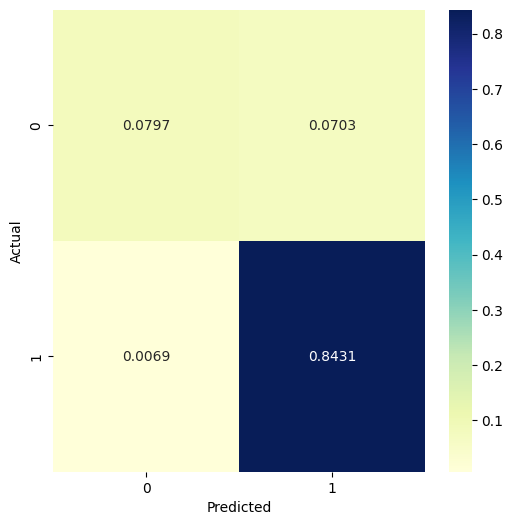

In [145]:
cm = confusion_matrix(y_test_5, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

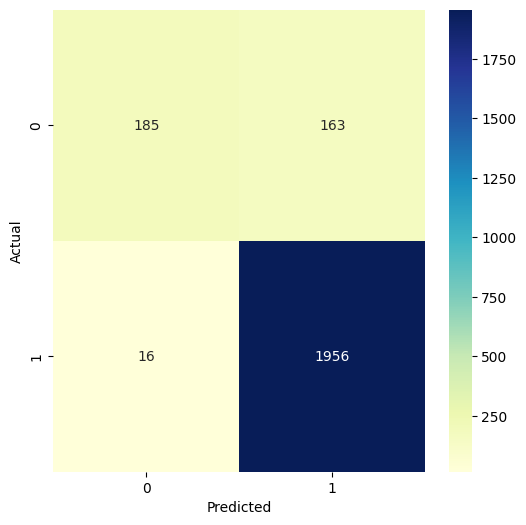

In [146]:
cm = confusion_matrix(y_test_5, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)